# Springboard Data Science Career Track: Capstone Project #1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

# November 2018 Ride Data

- Note: Unzip zip file containing Citi Bike trip data from November 2018 before going further

In [2]:
citibike_nov2018_orig = pd.read_csv('bike-data/201811-citibike-tripdata.csv')

In [3]:
citibike_nov2018_orig.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,254,2018-11-01 00:00:12.9100,2018-11-01 00:04:27.3870,3522.0,37 St & 24 Ave,40.770148,-73.912094,3513.0,21 St & Hoyt Ave S,40.774645,-73.923706,34117,Subscriber,1992,1
1,833,2018-11-01 00:00:16.3440,2018-11-01 00:14:09.4320,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,251.0,Mott St & Prince St,40.723180,-73.994800,32569,Subscriber,1986,2
2,683,2018-11-01 00:00:17.6630,2018-11-01 00:11:40.9170,3405.0,5 St & 6 Ave,40.670484,-73.982090,3584.0,Eastern Pkwy & Franklin Ave,40.670777,-73.957680,15795,Subscriber,1985,1
3,1840,2018-11-01 00:00:18.7970,2018-11-01 00:30:59.3050,3150.0,E 85 St & York Ave,40.775369,-73.948034,297.0,E 15 St & 3 Ave,40.734232,-73.986923,33290,Subscriber,1994,1
4,1212,2018-11-01 00:00:47.3230,2018-11-01 00:20:59.8840,325.0,E 19 St & 3 Ave,40.736245,-73.984738,212.0,W 16 St & The High Line,40.743349,-74.006818,17411,Subscriber,1989,1


In [4]:
citibike_nov2018_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260355 entries, 0 to 1260354
Data columns (total 15 columns):
tripduration               1260355 non-null int64
starttime                  1260355 non-null object
stoptime                   1260355 non-null object
start station id           1260275 non-null float64
start station name         1260275 non-null object
start station latitude     1260355 non-null float64
start station longitude    1260355 non-null float64
end station id             1260275 non-null float64
end station name           1260275 non-null object
end station latitude       1260355 non-null float64
end station longitude      1260355 non-null float64
bikeid                     1260355 non-null int64
usertype                   1260355 non-null object
birth year                 1260355 non-null int64
gender                     1260355 non-null int64
dtypes: float64(6), int64(4), object(5)
memory usage: 144.2+ MB


In [5]:
citibike_nov2018_orig.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

#### Rename the columns to make them a little friendlier to work with

In [6]:
columns_rename = ['tripduration', 'starttime', 'stoptime', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender']

citibike_nov2018_orig.columns = columns_rename

# Clean Up Nov. Citi Bike Data

In [7]:
# get overview of missing data; create function that returns total for each column and %
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing = pd.concat([total, percent], axis=1, keys = ['Total', 'Percent'])
    return missing

In [8]:
# call missing data function on citibike_nov2018 data set
missing_data(citibike_nov2018_orig)

,Total,Percent
end_station_name,80,0.006347
end_station_id,80,0.006347
start_station_name,80,0.006347
start_station_id,80,0.006347
gender,0,0.000000
birth_year,0,0.000000
usertype,0,0.000000
bikeid,0,0.000000
end_station_longitude,0,0.000000
end_station_latitude,0,0.000000


In [9]:
# since the percentage of the of missing values is so low and unlikely to severely impact results
# we'll use dropna() to drop any row(s) with missing values
citibike_nov2018_orig = citibike_nov2018_orig.dropna(how='any', axis=0)

In [10]:
missing_data(citibike_nov2018_orig)

,Total,Percent
gender,0,0.0
birth_year,0,0.0
usertype,0,0.0
bikeid,0,0.0
end_station_longitude,0,0.0
end_station_latitude,0,0.0
end_station_name,0,0.0
end_station_id,0,0.0
start_station_longitude,0,0.0
start_station_latitude,0,0.0


As we saw from the .info() call above, there are a few things we need to address. The first is  the starttime and stoptime columns;  they are both listed as objects when switching them to datetime's may be more beneficial for further analysis. 

Additionally the station name (both start and end), user type, and gender columns need to be switched from objects (and int for gender) to category types. 

In [11]:
# convert start and stop time to datetime types
citibike_nov2018_orig.starttime = pd.to_datetime(citibike_nov2018_orig.starttime)
citibike_nov2018_orig.stoptime = pd.to_datetime(citibike_nov2018_orig.stoptime)

In [12]:
# convert start_station_name, end_station_name, usertype and gender to category type
citibike_nov2018_orig.start_station_name = citibike_nov2018_orig.start_station_name.astype('category')
citibike_nov2018_orig.end_station_name = citibike_nov2018_orig.end_station_name.astype('category')
citibike_nov2018_orig.usertype = citibike_nov2018_orig.usertype.astype('category')
citibike_nov2018_orig.gender = citibike_nov2018_orig.gender.astype('category')

In [13]:
# check to see if we converted successfully
citibike_nov2018_orig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260275 entries, 0 to 1260354
Data columns (total 15 columns):
tripduration               1260275 non-null int64
starttime                  1260275 non-null datetime64[ns]
stoptime                   1260275 non-null datetime64[ns]
start_station_id           1260275 non-null float64
start_station_name         1260275 non-null category
start_station_latitude     1260275 non-null float64
start_station_longitude    1260275 non-null float64
end_station_id             1260275 non-null float64
end_station_name           1260275 non-null category
end_station_latitude       1260275 non-null float64
end_station_longitude      1260275 non-null float64
bikeid                     1260275 non-null int64
usertype                   1260275 non-null category
birth_year                 1260275 non-null int64
gender                     1260275 non-null category
dtypes: category(4), datetime64[ns](2), float64(6), int64(3)
memory usage: 122.6 MB


In [14]:
citibike_nov2018_orig.describe()

,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year
count,1.260275e+06,1.260275e+06,1.260275e+06,1.260275e+06,1.260275e+06,1.260275e+06,1.260275e+06,1.260275e+06,1.260275e+06
mean,8.495275e+02,1.611581e+03,4.073766e+01,-7.398238e+01,1.597933e+03,4.073740e+01,-7.398271e+01,2.761070e+04,1.979339e+03
std,6.208026e+03,1.451789e+03,3.036591e-02,1.876416e-02,1.450543e+03,2.999348e-02,1.881396e-02,6.726380e+03,1.210660e+01
min,6.100000e+01,7.200000e+01,4.064654e+01,-7.401713e+01,7.200000e+01,4.064654e+01,-7.406661e+01,1.452900e+04,1.885000e+03
25%,3.380000e+02,3.820000e+02,4.071882e+01,-7.399476e+01,3.800000e+02,4.071882e+01,-7.399510e+01,2.064900e+04,1.969000e+03
50%,5.590000e+02,5.070000e+02,4.073913e+01,-7.398518e+01,5.050000e+02,4.073827e+01,-7.398602e+01,3.017000e+04,1.982000e+03
75%,9.550000e+02,3.260000e+03,4.075757e+01,-7.397283e+01,3.260000e+03,4.075715e+01,-7.397356e+01,3.346400e+04,1.989000e+03
max,2.647286e+06,3.716000e+03,4.081439e+01,-7.390774e+01,3.716000e+03,4.081439e+01,-7.390774e+01,3.568800e+04,2.002000e+03


## Explore tripduration column further

From the last describe() call we can see that the max trip duration was 2,647,286 seconds long (which is approximately 4,400 minutes, or 73 hours)! This is an obvious outlier, which prompted a closer look at the data to see if there might be any other outliers. 

In [15]:
citibike_nov2018_orig.tripduration.describe()

count    1.260275e+06
mean     8.495275e+02
std      6.208026e+03
min      6.100000e+01
25%      3.380000e+02
50%      5.590000e+02
75%      9.550000e+02
max      2.647286e+06
Name: tripduration, dtype: float64

In [16]:
# calculate summary statistics of tripduration column
tripduration_mean, tripduration_std = np.mean(citibike_nov2018_orig.tripduration), np.std(citibike_nov2018_orig.tripduration)
print('Tripduration mean: %d' % tripduration_mean)
print('Tripduration std: %d' % tripduration_std)

Tripduration mean: 849
Tripduration std: 6208


In [17]:
# calculate interquartile range
q25, q75 = np.percentile(citibike_nov2018_orig.tripduration, 25), np.percentile(citibike_nov2018_orig.tripduration, 75)
tripduration_iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, tripduration_iqr))

Percentiles: 25th=338.000, 75th=955.000, IQR=617.000


In [18]:
#calculate the outlier cutoff
cut_off = tripduration_iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
tripduaration_outliers = [x for x in citibike_nov2018_orig.tripduration if x < lower or x > upper]
print('Identified outliers: %d' % len(tripduaration_outliers))

Identified outliers: 70762


In [19]:
# percentage of tripduations that were classified as 'outliers'
len(citibike_nov2018_orig.tripduration) / len(tripduaration_outliers)

17.810053418501454

In [20]:
# 1%, 2.5%, 25%, 50%, 75%, 97.5%, 99% percentiles for tripdurations
trip_percents = np.percentile(citibike_nov2018_orig.tripduration, [1, 2.5, 25, 50, 75, 97.5, 99.5])
trip_percents

array([ 100.,  130.,  338.,  559.,  955., 2381., 4385.])

In [21]:
# percentiles expressed in minutes
trip_percents / 60

array([ 1.66666667,  2.16666667,  5.63333333,  9.31666667, 15.91666667,
       39.68333333, 73.08333333])

In [22]:
# drop observations greater than 99.5% percentile (4386. seconds)
df_citibike_nov2018 = citibike_nov2018_orig.drop(citibike_nov2018_orig.index[citibike_nov2018_orig.tripduration > 4385.])
df_citibike_nov2018.shape

(1253976, 15)

In [23]:
# total number of observations dropped from original dataframe
1260355 - 1253976

6379

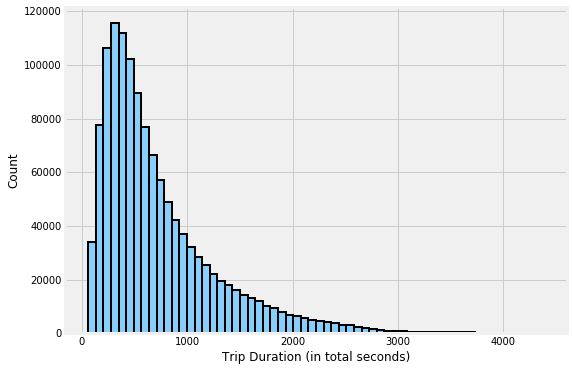

In [24]:
df_citibike_nov2018.tripduration.plot(kind='hist',
                                     bins = 60,
                                     color = 'lightskyblue',
                                     figsize = (8, 6),
                                     edgecolor = 'k',
                                     linewidth = 2)

_ = plt.xlabel('Trip Duration (in total seconds)')
_ = plt.ylabel('Count')

#### Check out birth_year column, may have potential outliers as well

In [25]:
df_citibike_nov2018.birth_year.describe()

count    1.253976e+06
mean     1.979348e+03
std      1.210756e+01
min      1.885000e+03
25%      1.969000e+03
50%      1.982000e+03
75%      1.989000e+03
max      2.002000e+03
Name: birth_year, dtype: float64

In [26]:
df_citibike_nov2018.birth_year.min()

1885

Ok, I don't know of anybody that is 133 years old...let's take a deeper dive into the distribution of ages by using the IQR method and with percentiles (similar to what we did above with regards to the trip duration column). 

In [27]:
# calculate summary statistics of birth_year column
birth_mean, birth_std = np.mean(df_citibike_nov2018.birth_year), np.std(df_citibike_nov2018.birth_year)
print('Mean Birth Year: %d' % birth_mean)
print('StDev of Birth Year: %d' % birth_std)

Mean Birth Year: 1979
StDev of Birth Year: 12


In [28]:
# calculate interquartile range
q25_birth, q75_birth = np.percentile(df_citibike_nov2018.birth_year, 25), np.percentile(df_citibike_nov2018.birth_year, 75)
birth_iqr = int(q75_birth - q25_birth)
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25_birth, q75_birth, birth_iqr))

Percentiles: 25th=1969.000, 75th=1989.000, IQR=20.000


In [29]:
#calculate the outlier cutoff
cut_off_birth = birth_iqr * 1.5
lower_birth, upper_birth = q25_birth - cut_off_birth, q75_birth + cut_off_birth
# identify outliers
birth_outliers = [x for x in df_citibike_nov2018.birth_year if x < lower_birth or x > upper_birth]
print('Identified outliers: %d' % len(birth_outliers))

Identified outliers: 1521


In [30]:
# 0.5%, 1%, 2.5%, 25%, 50%, 75%, 97.5%, 99% percentiles for birth_year
birth_percents = np.percentile(df_citibike_nov2018.birth_year, [0.5, 1, 2.5, 25, 50, 75, 97.5, 99.5])
birth_percents

array([1946., 1950., 1954., 1969., 1982., 1989., 1997., 2000.])

In [31]:
# drop observations that we're born before 1940 (year of birth that equals life expectancy in the USA)
df_citibike_nov2018_edit = df_citibike_nov2018.drop(df_citibike_nov2018.index[df_citibike_nov2018.birth_year < 1940])
df_citibike_nov2018_edit.shape

(1252372, 15)

In [32]:
# total number of observations dropped from original dataframe
1253976 - 1252372

1604

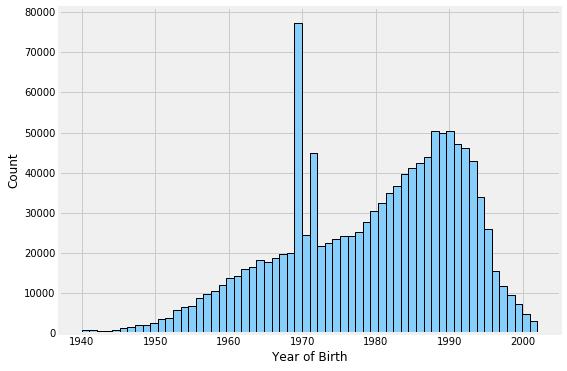

In [33]:
df_citibike_nov2018_edit.birth_year.plot(kind='hist',
                                     bins = 60,
                                     color = 'lightskyblue',
                                     figsize = (8, 6),
                                     edgecolor = 'k',
                                     linewidth = 1)

_ = plt.xlabel('Year of Birth')
_ = plt.ylabel('Count')

As we can see from the histogram of birth years, riders tend to be younger with most riders seeming to be concentrated between the mid-1980's and early 1990's. However there is also an interesting spike around 1970. At the moment I don't really know why this is but it is something to keep in mind to explore further. 

In [34]:
# check out dataframe one more time
df_citibike_nov2018_edit.describe()

,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year
count,1.252372e+06,1.252372e+06,1.252372e+06,1.252372e+06,1.252372e+06,1.252372e+06,1.252372e+06,1.252372e+06,1.252372e+06
mean,7.313262e+02,1.611135e+03,4.073763e+01,-7.398239e+01,1.596919e+03,4.073737e+01,-7.398272e+01,2.761638e+04,1.979425e+03
std,5.684179e+02,1.451813e+03,3.034450e-02,1.876196e-02,1.450497e+03,2.996878e-02,1.881352e-02,6.724312e+03,1.190865e+01
min,6.100000e+01,7.200000e+01,4.064654e+01,-7.401713e+01,7.200000e+01,4.064654e+01,-7.406661e+01,1.452900e+04,1.940000e+03
25%,3.370000e+02,3.820000e+02,4.071882e+01,-7.399476e+01,3.800000e+02,4.071882e+01,-7.399510e+01,2.065700e+04,1.969000e+03
50%,5.570000e+02,5.070000e+02,4.073913e+01,-7.398542e+01,5.050000e+02,4.073827e+01,-7.398602e+01,3.017800e+04,1.982000e+03
75%,9.460000e+02,3.260000e+03,4.075757e+01,-7.397283e+01,3.260000e+03,4.075715e+01,-7.397356e+01,3.346500e+04,1.989000e+03
max,4.385000e+03,3.716000e+03,4.081439e+01,-7.390774e+01,3.716000e+03,4.081439e+01,-7.390774e+01,3.568800e+04,2.002000e+03


In [35]:
# make new dataframe for EDA
df_citibike = df_citibike_nov2018_edit

Looks like we're good to go and can finally start exploring our data a little bit!

## INITIAL EXPLORATORY DATA ANALYSIS

### First analysis of total rides using time series

In [36]:
# set starttime as the DatetimeIndex
eda_df = df_citibike.set_index(pd.DatetimeIndex(df_citibike.starttime))

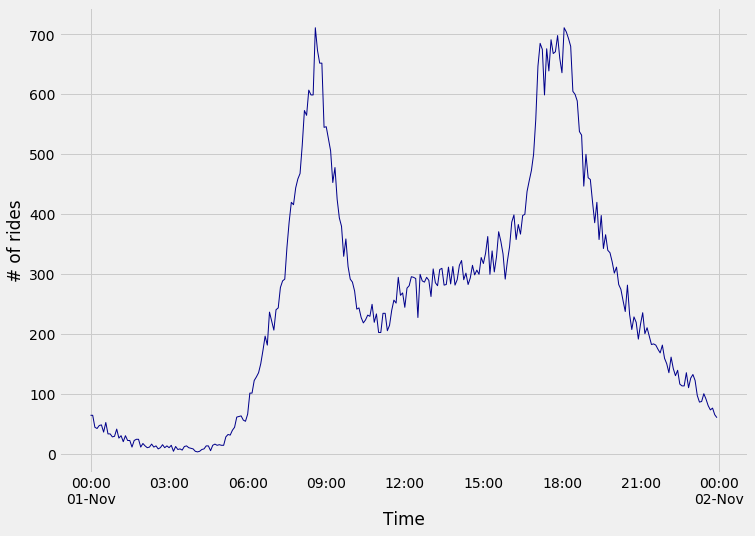

In [37]:
plt.style.use('fivethirtyeight')
# locate all observations from Nov. 1st
nov1 = eda_df.loc['2018-11-1']
nov1.starttime.resample('5T').count().plot(kind='line',
                                           color = 'darkblue',
                                           figsize = (11, 8), 
                                           linewidth = 1)

_ = plt.xlabel('Time')
_ = plt.ylabel('# of rides')

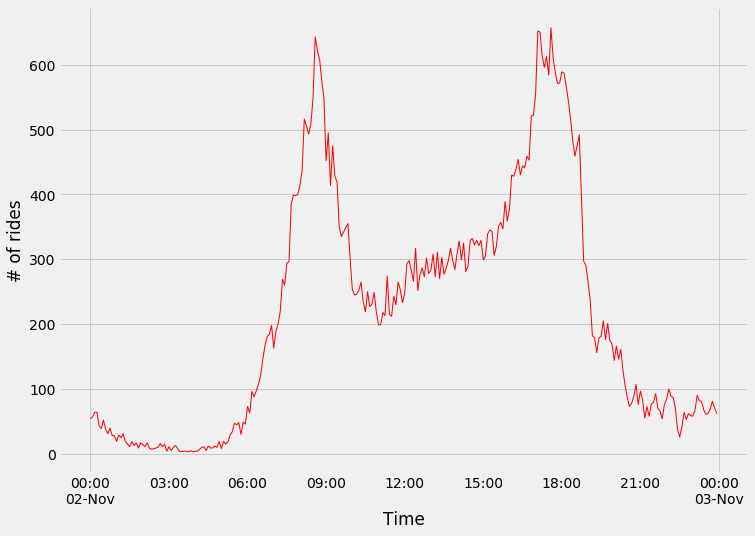

In [38]:
# locate all observations from Nov. 2nd
nov2 = eda_df.loc['2018-11-2']
nov2.starttime.resample('5T').count().plot(kind='line',
                                           color = 'red',
                                           figsize = (11, 8), 
                                           linewidth = 1)

_ = plt.xlabel('Time')
_ = plt.ylabel('# of rides')

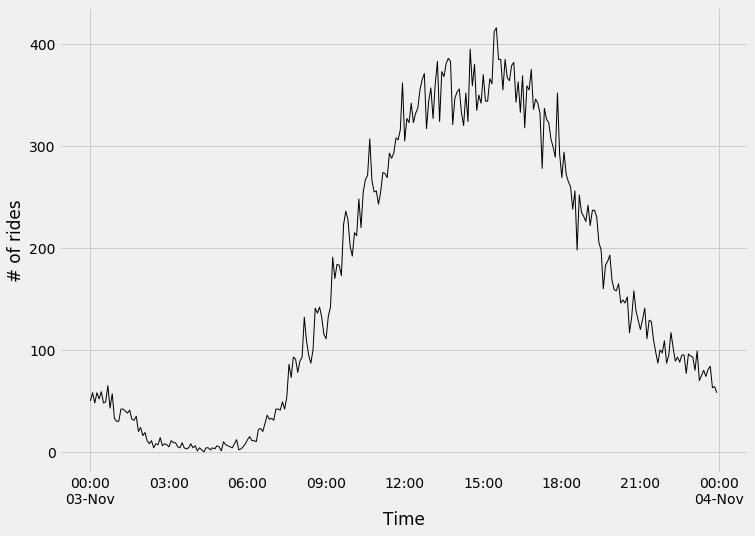

In [39]:
# locate all observations from Nov. 3rd
nov3 = eda_df.loc['2018-11-3']
nov3.starttime.resample('5T').count().plot(kind='line',
                                           color = 'black',
                                           figsize = (11, 8), 
                                           linewidth = 1)

_ = plt.xlabel('Time')
_ = plt.ylabel('# of rides')

#### Look into total rides on a weekly basis

In [40]:
# break down observations based off of each week of November
week1 = eda_df.loc['2018-11-1':'2018-11-3']
week2 = eda_df.loc['2018-11-4':'2018-11-10']
week3 = eda_df.loc['2018-11-11':'2018-11-17']
week4 = eda_df.loc['2018-11-18':'2018-11-24']
week5 = eda_df.loc['2018-11-25':'2018-11-30']

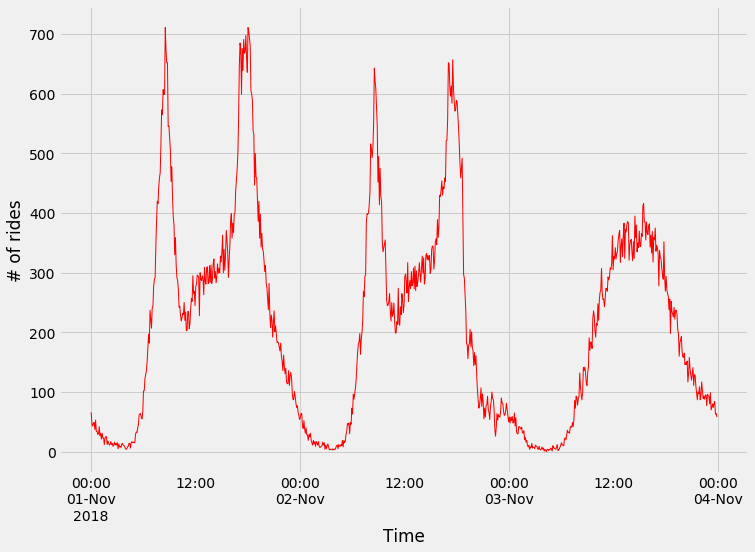

In [41]:
week1.starttime.resample('5min').count().plot(kind='line',
                                           color = 'red',
                                           figsize = (11, 8), 
                                           linewidth = 1)

_ = plt.xlabel('Time')
_ = plt.ylabel('# of rides')

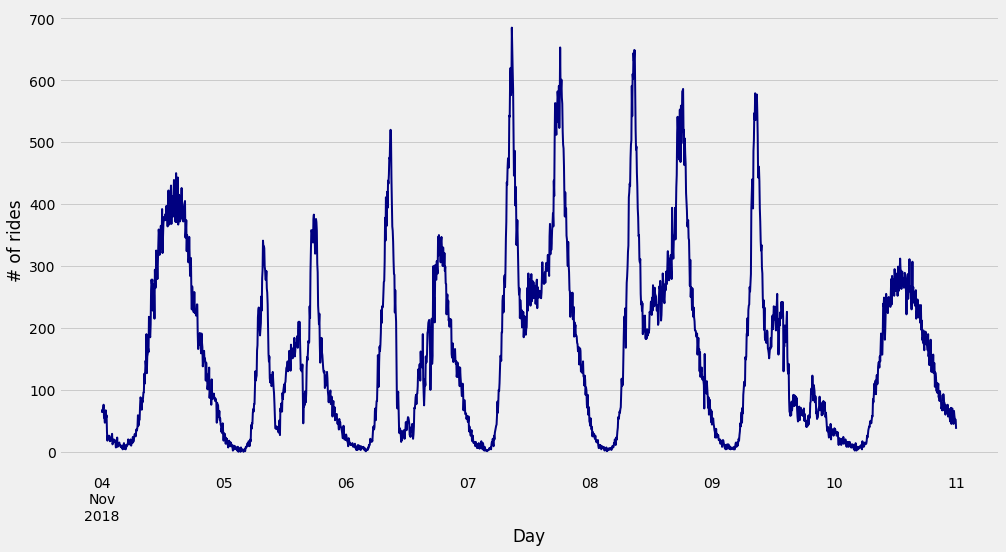

In [42]:
week2.starttime.resample('5min').count().plot(kind='line',
                                           color = 'navy',
                                           figsize = (15, 8), 
                                           linewidth = 2)

_ = plt.xlabel('Day')
_ = plt.ylabel('# of rides')

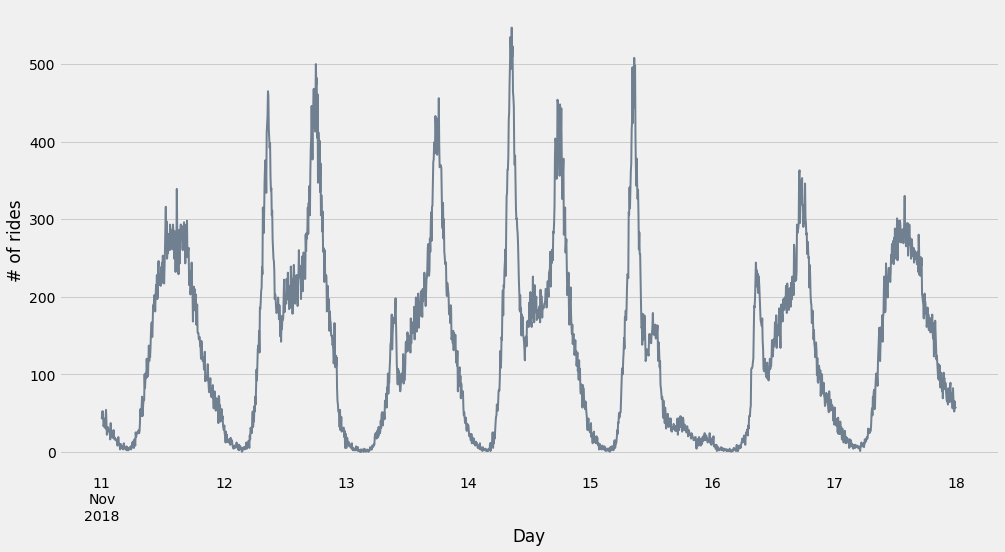

In [43]:
week3.starttime.resample('5min').count().plot(kind='line',
                                           color = 'slategrey',
                                           figsize = (15, 8), 
                                           linewidth = 2)

_ = plt.xlabel('Day')
_ = plt.ylabel('# of rides')

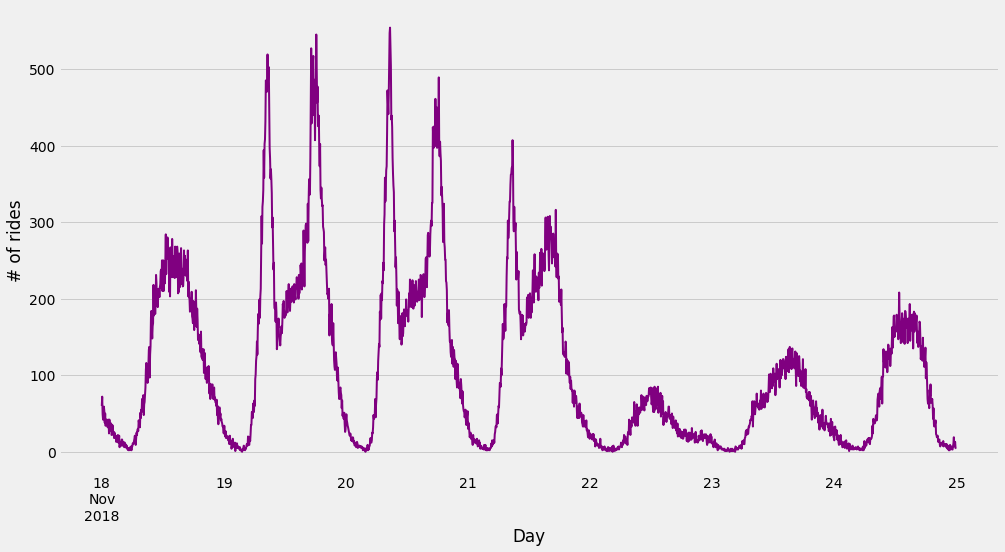

In [44]:
week4.starttime.resample('5min').count().plot(kind='line',
                                           color = 'purple',
                                           figsize = (15, 8), 
                                           linewidth = 2)

_ = plt.xlabel('Day')
_ = plt.ylabel('# of rides')

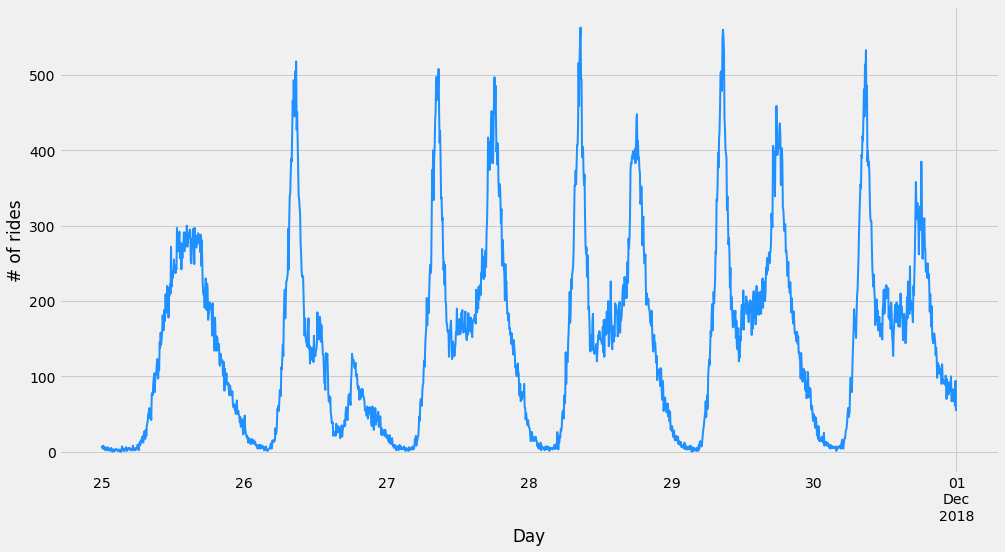

In [45]:
week5.starttime.resample('5min').count().plot(kind='line',
                                           color = 'dodgerblue',
                                           figsize = (15, 8), 
                                           linewidth = 2)

_ = plt.xlabel('Day')
_ = plt.ylabel('# of rides')

### EDA: Who are the riders and where are they riding?

In [46]:
top_birth_years = df_citibike.birth_year.value_counts().reset_index().head(15)

top_birth_years.columns = ['Year', 'Count']

top_birth_years

,Year,Count
0,1969,77379
1,1988,50487
2,1990,50331
3,1989,49994
4,1991,47133
5,1992,46062
6,1987,43834
7,1993,42912
8,1986,42360
9,1985,41274


In [47]:
# total number of observations from top 15 birth years
top_birth_years.Count.sum()

669251

In [48]:
# percentage of top 15 years of birth that comprise the whole data set
print('Percentage of top 15 years of birth: ', 
      (top_birth_years.Count.sum()/ df_citibike.shape[0])*100)

Percentage of top 15 years of birth:  53.438674770755014


These 15 years of birth make up over 53% of the ridership! As we can see from the column above, 14 of the years are in the 1980's or early 1990's but there is one year, 1969, that not only bucks that trend but by far has the most ridership.

#### Breakdown of ridership by gender

The value '1' means the rider was male while '2' means the rider was female. '0' signifies that the sex of the rider was unknown. 

In [49]:
gender_breakdown = df_citibike.gender.value_counts().reset_index()
gender_breakdown.columns = ['Gender', 'Count']
gender_breakdown

,Gender,Count
0,1,899010
1,2,288628
2,0,64734


### EDA: Most popular stations

In [50]:
top_10_sstations = eda_df.start_station_name.value_counts().reset_index().head(10)
top_10_sstations.columns = ['Name', 'Count']
top_10_sstations

,Name,Count
0,Pershing Square North,10451
1,E 17 St & Broadway,8147
2,W 21 St & 6 Ave,8042
3,Broadway & E 22 St,7539
4,Broadway & E 14 St,7098
5,8 Ave & W 33 St,7052
6,Broadway & W 60 St,7010
7,8 Ave & W 31 St,6904
8,Lafayette St & E 8 St,6413
9,W 16 St & 8 Ave,6259


In [51]:
top_10_estations = eda_df.end_station_name.value_counts().reset_index().head(10)
top_10_estations.columns = ['Name', 'Count']
top_10_estations

,Name,Count
0,Pershing Square North,10484
1,E 17 St & Broadway,8696
2,W 21 St & 6 Ave,8200
3,Broadway & E 22 St,8042
4,Broadway & E 14 St,7221
5,8 Ave & W 33 St,7082
6,8 Ave & W 31 St,6931
7,Broadway & W 60 St,6798
8,Lafayette St & E 8 St,6578
9,W 16 St & 8 Ave,6304


In [52]:
usertype = eda_df.usertype.value_counts().reset_index().head(10)
usertype.columns = ['User Type', 'Count']
usertype

,User Type,Count
0,Subscriber,1160931
1,Customer,91441


In [53]:
# empirical cumulative distribution function (ECDF)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

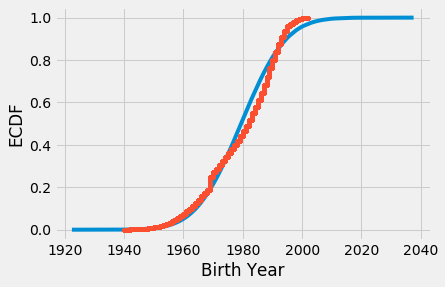

In [57]:
x_birthyear, y_birthyear = ecdf(eda_df.birth_year)

mean_birthyear = np.mean(eda_df.birth_year)
std_birthyear = np.std(eda_df.birth_year)

# sample out of a normal distribution with above mean and std
samples_birthyear = np.random.normal(mean_birthyear, std_birthyear, 1000000)
x_birth_theor, y_birth_theor = ecdf(samples_birthyear)

# Generate plot
plt.plot(x_birth_theor, y_birth_theor)
plt.plot(x_birthyear, y_birthyear, marker='.', linestyle = 'none')

# Label the axes
_ = plt.xlabel('Birth Year')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()